## Importando Bibliotecas

In [113]:
import tensorflow as tf 
from tensorflow import keras
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Input, Dense
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt 
from keras.optimizers import Adam
from keras.models import Model
import sklearn as sk
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from keras.utils import plot_model
import time
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from mpl_toolkits.mplot3d import Axes3D

## Pre-processamento dos dados
**Carregando os dados de treino e teste:**

In [2]:
train_images = pd.read_csv('../fashion-mnist_train.csv')
test_images = pd.read_csv('../fashion-mnist_test.csv')

**Separando as labels do conjuntos:**

In [3]:
train_labels=train_images.loc[:, ['label']]
train_images=train_images.drop(['label'], axis=1)
test_labels=test_images.loc[:, ['label']]
test_images=test_images.drop(['label'], axis=1)

**Normalizando os data-sets:**

In [4]:
train_images = train_images / 255.0
test_images = test_images / 255.0


----------------------
## Construção do modelo base
**Esta rede será utilizada posteriomente para comparações entre os modelos de dimensionalidade reduzida utilizando PCA e autoencoder.**

**Definição da estrutura do modelo por meio do Keras Sequential:**

In [5]:
model = keras.Sequential([
    keras.layers.Dense(64,activation=tf.nn.relu,input_dim=(784)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(32, activation=tf.nn.softmax)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
Total params: 62,688
Trainable params: 62,688
Non-trainable params: 0
_________________________________________________________________


**Compilação do modelo:**

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Treino do modelo:**

In [7]:
start_time = time.time()
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2, shuffle=True)
end_time = time.time()

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 6s 119us/sample - loss: 0.5500 - accuracy: 0.8060 - val_loss: 0.4538 - val_accuracy: 0.8304
Epoch 2/10
48000/48000 [==============================] - 5s 104us/sample - loss: 0.3905 - accuracy: 0.8566 - val_loss: 0.3851 - val_accuracy: 0.8559
Epoch 3/10
48000/48000 [==============================] - 4s 92us/sample - loss: 0.3526 - accuracy: 0.8704 - val_loss: 0.3573 - val_accuracy: 0.8727
Epoch 4/10
48000/48000 [==============================] - 4s 92us/sample - loss: 0.3263 - accuracy: 0.8801 - val_loss: 0.3514 - val_accuracy: 0.8749
Epoch 5/10
48000/48000 [==============================] - 4s 93us/sample - loss: 0.3113 - accuracy: 0.8856 - val_loss: 0.3472 - val_accuracy: 0.8774
Epoch 6/10
48000/48000 [==============================] - 4s 90us/sample - loss: 0.2932 - accuracy: 0.8906 - val_loss: 0.3605 - val_accuracy: 0.8756
Epoch 7/10
48000/48000 [==============================

In [8]:
(end_time-start_time)/10

5.234742999076843

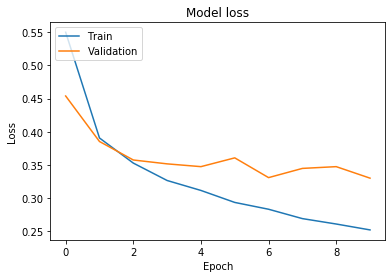

In [9]:
# Grafico para analise de custo do treino e da validacao
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Verificação dos resultados do modelo**

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Model - 3 layers - test loss:", test_loss * 100)
print("Model - 3 layers - test accuracy:", test_acc * 100)

10000/10000 [==============================] - 1s 51us/sample - loss: 0.3153 - accuracy: 0.8868
Model - 3 layers - test loss: 31.526307719945905
Model - 3 layers - test accuracy: 88.67999911308289


-----------------------------
## Redução de Dimensionalidade Usando Principal component analysis (PCA)

**Pré-processamento de dados (Feature Scaling)**

In [11]:
scaler = StandardScaler()

#fit aplicado para apenas o conjunto de treino
scaler.fit(train_images)

#aplicacao da transformacao para ambos os conjuntos de treino e de test
train_images_r = scaler.transform(train_images)
test_images_r = scaler.transform(test_images)


**Definição do número de componentes:**

In [12]:
pca = PCA(n_components=3)

**Construção dos novos datasets de treino e de teste com dimensões reduzidas usando o PCA:**

In [13]:
pca.fit(train_images_r)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [14]:
train_images_r = pca.transform(train_images_r)
test_images_r = pca.transform(test_images_r)

**Preprocessamento: normalização e alteração do tipo dos dados de numpy array para pandas dataframe:**

In [15]:
#esse conjunto rr sera utilizado pela rede neural
train_images_rr = normalize(train_images_r)
test_images_rr = normalize(test_images_r)
train_images_rr = pd.DataFrame(data=train_images_rr)
test_images_rr = pd.DataFrame(data=test_images_rr)

#esse conjunto r sera utilizado posteriormente para a clusterizacao 
train_images_r = pd.DataFrame(data=train_images_r)
test_images_r= pd.DataFrame(data=test_images_r)

**Modelo Baseline que receberá os dados com dimensões reduzidas pelo PCA:**

In [16]:
model_r = keras.Sequential([
    keras.layers.Dense(64,activation=tf.nn.relu,input_dim=(3)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(32, activation=tf.nn.softmax)
])

model_r.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                256       
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                4128      
Total params: 12,704
Trainable params: 12,704
Non-trainable params: 0
_________________________________________________________________


**Compilação do modelo:**

In [17]:
model_r.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**Treino do modelo:**

In [18]:
start_time = time.time()
history_r = model_r.fit(train_images_rr, train_labels, epochs=10, validation_split=0.2, shuffle=True)
end_time = time.time()

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s 62us/sample - loss: 1.1477 - accuracy: 0.5613 - val_loss: 1.0421 - val_accuracy: 0.5837
Epoch 2/10
48000/48000 [==============================] - 3s 66us/sample - loss: 1.0214 - accuracy: 0.5918 - val_loss: 1.0264 - val_accuracy: 0.5909
Epoch 3/10
48000/48000 [==============================] - 4s 79us/sample - loss: 1.0113 - accuracy: 0.5978 - val_loss: 1.0206 - val_accuracy: 0.5965
Epoch 4/10
48000/48000 [==============================] - 4s 76us/sample - loss: 1.0056 - accuracy: 0.6007 - val_loss: 1.0173 - val_accuracy: 0.5936
Epoch 5/10
48000/48000 [==============================] - 3s 65us/sample - loss: 1.0023 - accuracy: 0.6018 - val_loss: 1.0180 - val_accuracy: 0.5959
Epoch 6/10
48000/48000 [==============================] - 3s 64us/sample - loss: 0.9995 - accuracy: 0.6031 - val_loss: 1.0113 - val_accuracy: 0.5948
Epoch 7/10
48000/48000 [==============================] 

In [19]:
(end_time-start_time)/10

3.14432430267334

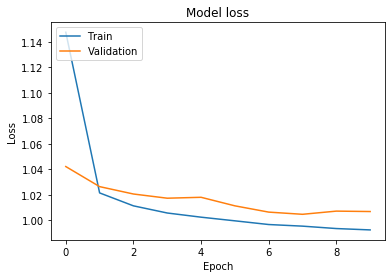

In [20]:
# Grafico para analise de custo do treino e da validacao
plt.plot(history_r.history['loss'])
plt.plot(history_r.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Verificação dos resultados do modelo:**

In [21]:
test_loss, test_acc = model_r.evaluate(test_images_rr, test_labels)
print("Model - 3 layers - test loss:", test_loss * 100)
print("Model - 3 layers - test accuracy:", test_acc * 100)

10000/10000 [==============================] - 0s 28us/sample - loss: 0.9953 - accuracy: 0.6064
Model - 3 layers - test loss: 99.5256084060669
Model - 3 layers - test accuracy: 60.64000129699707


------------------------------------------------------

## Redução de Dimensionalidade Usando Autoencoders

**Instanciação da rede do autoencoder:**

In [67]:
#dimensao do output do processo de encoding, ou seja, dimensao apos compressao
encoding_dim = 2
#declaracao da imagen de input
input_img = Input(shape=(784,))
#representacao do input apos encoding
encoded = Dense(encoding_dim, activation='relu')(input_img)
#representacao da reconstrucao do input
decoded = Dense(784, activation='sigmoid')(encoded)

• Modelo do autoencoding

In [68]:
# modelo do input para sua a sua reconstrucao apos decoding
autoencoder = Model(input_img, decoded)

• Modelo do encoding

In [69]:
#modelo que mapeia o input relativo a sua reconstrucao apos encoding
encoder = Model(input_img, encoded)

In [70]:
#declaracao da o input comprimido
encoded_input = Input(shape=(encoding_dim,))
# recupera a ultima camada do modelo do autoencoder
decoder_layer = autoencoder.layers[-1]

• Modelo do decoding

In [71]:
decoder = Model(encoded_input, decoder_layer(encoded_input))

**Compilação do Modelo do Autoencoder:**

In [72]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

**Treino do Autoencoder:**

In [73]:
history_auto = autoencoder.fit(train_images, train_images,epochs=10,shuffle=True, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 7s 152us/step - loss: 0.4412 - val_loss: 0.4121
Epoch 2/10
48000/48000 [==============================] - 8s 157us/step - loss: 0.4048 - val_loss: 0.3990
Epoch 3/10
48000/48000 [==============================] - 6s 134us/step - loss: 0.3944 - val_loss: 0.3910
Epoch 4/10
48000/48000 [==============================] - 6s 124us/step - loss: 0.3872 - val_loss: 0.3847
Epoch 5/10
48000/48000 [==============================] - 6s 127us/step - loss: 0.3817 - val_loss: 0.3804
Epoch 6/10
48000/48000 [==============================] - 7s 150us/step - loss: 0.3786 - val_loss: 0.3784
Epoch 7/10
48000/48000 [==============================] - 7s 148us/step - loss: 0.3773 - val_loss: 0.3776
Epoch 8/10
48000/48000 [==============================] - 8s 175us/step - loss: 0.3767 - val_loss: 0.3771
Epoch 9/10
48000/48000 [==============================] - 7s 147us/step - loss: 0.3763 - val_loss: 0.3

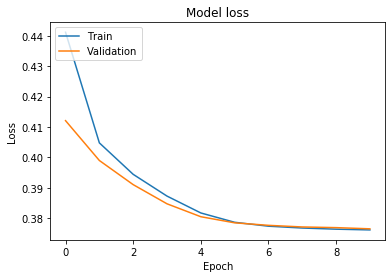

In [74]:
# Grafico para analise de custo do treino e da validacao
plt.plot(history_auto.history['loss'])
plt.plot(history_auto.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Utilização do encoding para a compressão das imagens do conjunto de treino e de test, e normalização para utilização posterior na rede neural.**

In [91]:
encoded_train_images = encoder.predict(train_images)
encoded_test_images = encoder.predict(test_images)
encoded_train_images = normalize(encoded_train_images)
encoded_test_images = normalize(encoded_test_images)

In [92]:
#transformacao de numpy array para pandas data frame
train_images_a = pd.DataFrame(data=encoded_train_images)
test_images_a =pd.DataFrame(data=encoded_test_images)

**Modelo Baseline que receberá os dados com dimensões reduzidas pelo PCA:**

In [93]:
model_a = keras.Sequential([
    keras.layers.Dense(64,activation=tf.nn.relu,input_dim=(2)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(32, activation=tf.nn.softmax)
])

model_a.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 64)                192       
_________________________________________________________________
dense_22 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_23 (Dense)             (None, 32)                4128      
Total params: 12,640
Trainable params: 12,640
Non-trainable params: 0
_________________________________________________________________


**Compilação do modelo:**

In [94]:
model_a.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**Treino do modelo:**

In [95]:
start_time = time.time()
history_a = model_a.fit(train_images_a, train_labels, epochs=10, validation_split=0.2, shuffle=True)
end_time = time.time()

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s 67us/sample - loss: 1.7633 - accuracy: 0.3179 - val_loss: 1.6398 - val_accuracy: 0.3732
Epoch 2/10
48000/48000 [==============================] - 3s 54us/sample - loss: 1.6343 - accuracy: 0.3676 - val_loss: 1.6253 - val_accuracy: 0.3713
Epoch 3/10
48000/48000 [==============================] - 3s 59us/sample - loss: 1.6201 - accuracy: 0.3784 - val_loss: 1.6113 - val_accuracy: 0.3900
Epoch 4/10
48000/48000 [==============================] - 3s 68us/sample - loss: 1.6104 - accuracy: 0.3822 - val_loss: 1.6037 - val_accuracy: 0.3878
Epoch 5/10
48000/48000 [==============================] - 3s 58us/sample - loss: 1.6048 - accuracy: 0.3844 - val_loss: 1.6027 - val_accuracy: 0.3828
Epoch 6/10
48000/48000 [==============================] - 3s 65us/sample - loss: 1.6001 - accuracy: 0.3855 - val_loss: 1.5921 - val_accuracy: 0.3901
Epoch 7/10
48000/48000 [==============================] 

In [96]:
((end_time-start_time)/10)

2.97543261051178

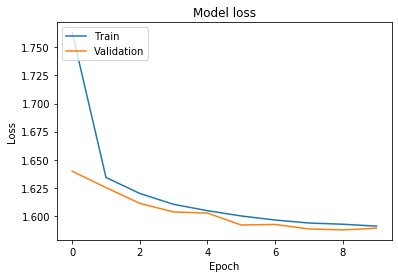

In [97]:
# Grafico para analise de custo do treino e da validacao
plt.plot(history_a.history['loss'])
plt.plot(history_a.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [98]:
test_loss, test_acc = model_a.evaluate(test_images_a, test_labels)
print("Model - 3 layers - test loss:", test_loss * 100)
print("Model - 3 layers - test accuracy:", test_acc * 100)

10000/10000 [==============================] - 0s 30us/sample - loss: 1.5783 - accuracy: 0.3921
Model - 3 layers - test loss: 157.8347763824463
Model - 3 layers - test accuracy: 39.21000063419342


------------------------------------------------------

## Clustering com K-means

**Optamos pela utilização das imagens reduzidas por meio do PCA, já que obtiveram por meio deste modelo os melhores resultados de predição na rede neural.**

In [102]:
train_images_k = train_images_r
test_images_k = test_images_r

**Construção do modelo e execução do k-means com 10 clusters.**

In [107]:
#instanciacao do modelo com 10 clusters
kmean_model = KMeans(n_clusters=10, random_state=10)
#execucao do kmeans
kmean_model.fit(train_images_k)
#retorno dos labels dos clusteres gerados por meio do kmeans
labels = kmean_model.labels_

In [108]:
#retorno das centroids geradas pelo kmeans
cluster_centroids = kmean_model.cluster_centers_

**Coeficiente de Silhouette**

In [105]:
silhouette_score(X = train_images_k, labels = labels, random_state = 10)

0.3633611126896131

**V-measure Score**

In [109]:
metrics.v_measure_score(train_labels.values.ravel(), labels, beta=1.0)

0.4455785750478227

---------------------------------
## Clustering com o DBScan


               0          1          2
0      10.664973  14.993363  -0.689468
1     -11.989748  11.812770  -5.801049
2      20.517671   1.579784   6.770122
3       9.634535  -6.790917  -0.907860
4      11.493442 -11.655488  -7.208334
...          ...        ...        ...
59995   0.871480  15.580971 -11.665720
59996 -10.172701 -14.933856  -0.769995
59997   7.148767  -0.543565  -0.874060
59998   4.434153  20.832704  -0.576302
59999  -9.106810  14.831154  -3.674678

[60000 rows x 3 columns]
[-1 -1 -1 ... -1 -1 -1]
60000
Estimated number of clusters: 86
Estimated number of noise points: 51714


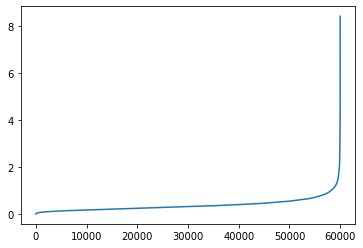

In [112]:

train_images_dbscan = train_images_r
test_images_dbscan = test_images_r

print(train_images_dbscan)


neigh = NearestNeighbors(n_neighbors=10)
nbrs = neigh.fit(train_images_dbscan)
distances, indices = nbrs.kneighbors(train_images_dbscan)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)


db = DBSCAN(eps=0.38, min_samples=10).fit(train_images_dbscan)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(labels)
print(len(labels))
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)